# Machine learning on Human Weight/Height Data

Using http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html as input.

In [43]:
import requests
import lxml.html as lh
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib notebook

In [44]:
url='http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [45]:
#Checking the number of elements in first 12 rows. Just so we know that the table matches our expectations.
[len(T) for T in tr_elements[:12]]

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [46]:
#Create empty list
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Index"
2:"Height(Inches)"
3:"Weight(Pounds)"


In [47]:
#Since our first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=3:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to float
            try:
                data=float(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [48]:
#Checking if each of our columns has the same length of 25000
[len(C) for (title,C) in col]

[25000, 25000, 25000]

In [49]:
#Here we create a pandas dataframe from our table
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [50]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [51]:
#We can notice that pandas' dataframe has created a different column for index, so we're just going to merge them both.
df.set_index("Index")

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.99250
2,71.51521,136.48730
3,69.39874,153.02690
4,68.21660,142.33540
5,67.78781,144.29710
6,68.69784,123.30240
7,69.80204,141.49470
8,70.01472,136.46230
9,67.90265,112.37230


In [52]:
#Getting some basic information about our dataframe, like the avg mean of columns.
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [53]:
#Renaming columns so it's tad bit easier handling the code.
df.rename(columns={'Height(Inches)':'Height',
                          'Weight(Pounds)':'Weight'}, 
                 inplace=True)
df.columns

Index(['Index', 'Height', 'Weight'], dtype='object')

<IPython.core.display.Javascript object>


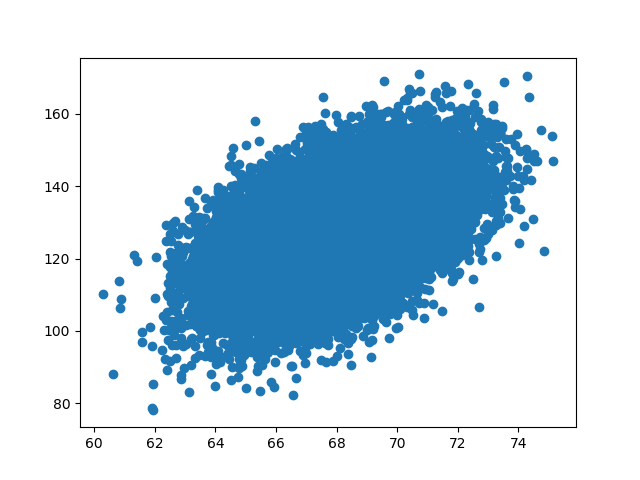

In [57]:
plt.scatter(df.Height,df.Weight)

In [55]:
#We can notice a strong linear correlation